In [1]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import tensorflow.keras as keras
from sklearn.model_selection import StratifiedShuffleSplit
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [3]:
train_generator = train_datagen.flow_from_directory(
    'dataset/Train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training') # set as training data

Found 216 images belonging to 2 classes.


In [4]:
validation_generator = train_datagen.flow_from_directory(
    'dataset/Train', # same directory as training data
    target_size=(128, 128),
    batch_size=16,
    class_mode='binary',
    subset='validation') # set as validation data

Found 54 images belonging to 2 classes.


In [5]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.5))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'], early_stopping=True)

In [6]:
CNN = classifier.fit_generator(train_generator,
                         steps_per_epoch = 10,
                         epochs = 30,
                         validation_data = validation_generator,
                         validation_steps = 5)

Epoch 1/30
10/10 [==============================] - 17s 2s/step - loss: 1.2983 - accuracy: 0.5545 - val_loss: 0.7129 - val_accuracy: 0.5429
Epoch 2/30
10/10 [==============================] - 14s 1s/step - loss: 0.7227 - accuracy: 0.5691 - val_loss: 0.7297 - val_accuracy: 0.4429
Epoch 3/30
10/10 [==============================] - 17s 2s/step - loss: 0.7093 - accuracy: 0.5737 - val_loss: 0.6692 - val_accuracy: 0.5571
Epoch 4/30
10/10 [==============================] - 16s 2s/step - loss: 0.6740 - accuracy: 0.6480 - val_loss: 0.6502 - val_accuracy: 0.6286
Epoch 5/30
10/10 [==============================] - 18s 2s/step - loss: 0.6646 - accuracy: 0.6410 - val_loss: 0.6425 - val_accuracy: 0.6714
Epoch 6/30
10/10 [==============================] - 18s 2s/step - loss: 0.5704 - accuracy: 0.7308 - val_loss: 0.5178 - val_accuracy: 0.8143
Epoch 7/30
10/10 [==============================] - 16s 2s/step - loss: 0.6058 - accuracy: 0.6711 - val_loss: 0.5440 - val_accuracy: 0.8286
Epoch 8/30
10/10 [==

In [19]:
# Load the data for making predictions

prediction_set = test_datagen.flow_from_directory('dataset/Test', # relative path from working directoy
                                            target_size = (128, 128),batch_size=1,
                                            class_mode = 'binary')

Found 10 images belonging to 1 classes.


In [18]:
_, acc = classifier.evaluate_generator(prediction_set,verbose=0)
print('> %.3f' % (acc * 100.0))

> 50.000


In [8]:
predictions=classifier.predict(prediction_set)

In [9]:
i=np.random.choice(len(predictions))

[0.00734878]
[0.85206765]
[0.8448101]
[0.00085647]
[0.01470774]
[0.9880107]
[0.91500056]
[0.99942124]
[0.05005785]
[0.00119764]


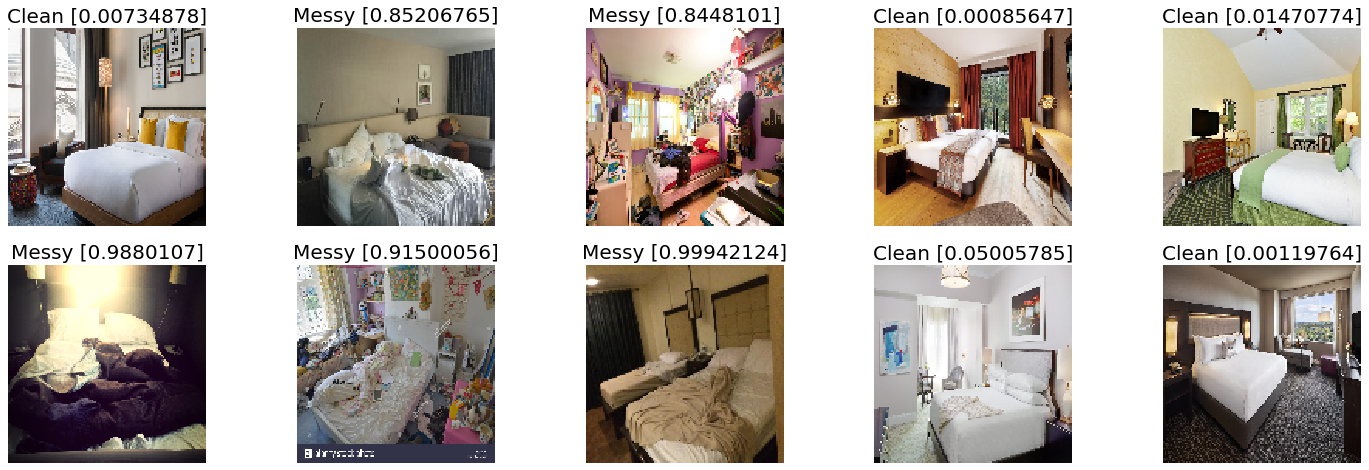

In [12]:
plt.figure(figsize=(25,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(prediction_set[i][0][0])
    plt.axis('off')
    plt.title("Messy "+str(predictions[i])  if predictions[i] > 0.5 else "Clean "+str(predictions[i]), fontsize=20)
    print(predictions[i])

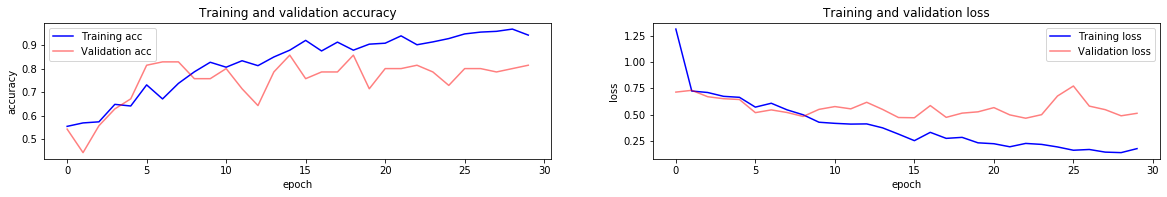

In [20]:
acc = CNN.history['accuracy']
val_acc = CNN.history['val_accuracy']
loss = CNN.history['loss']
val_loss = CNN.history['val_loss']
 
epochs = range(len(acc))

plt.figure(figsize=(20,2.5))

plt.subplot(121)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'b', c='r',alpha=0.5,label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
 

plt.subplot(122)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'b', c='r', alpha=0.5,label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
 
plt.show()